In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

print("Dimensions des données :", X.shape)
print("Dimensions des labels :", y.shape)

Dimensions des données : (70000, 784)
Dimensions des labels : (70000,)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

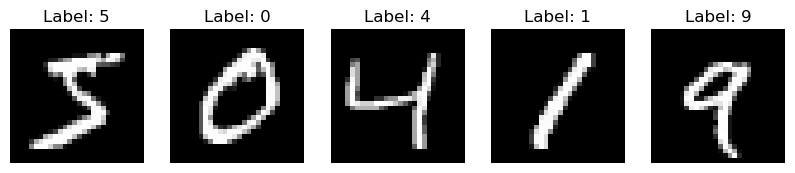

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28,28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

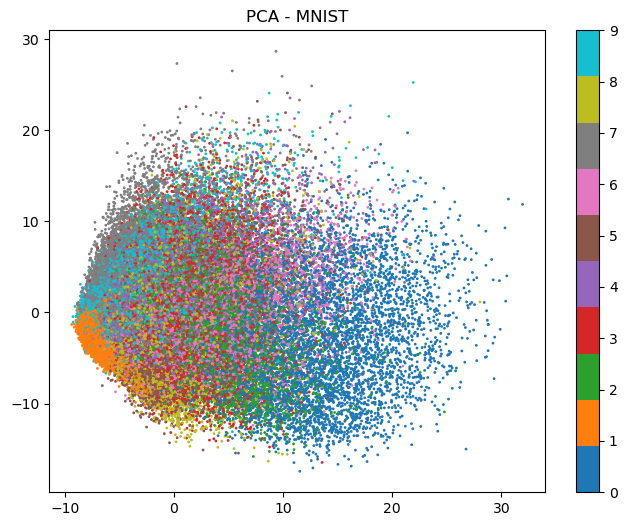

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=1)
plt.title("PCA - MNIST")
plt.colorbar()
plt.show()


In [13]:
print("Variance expliquée :", pca.explained_variance_ratio_)

Variance expliquée : [0.05642719 0.04041226]


In [15]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

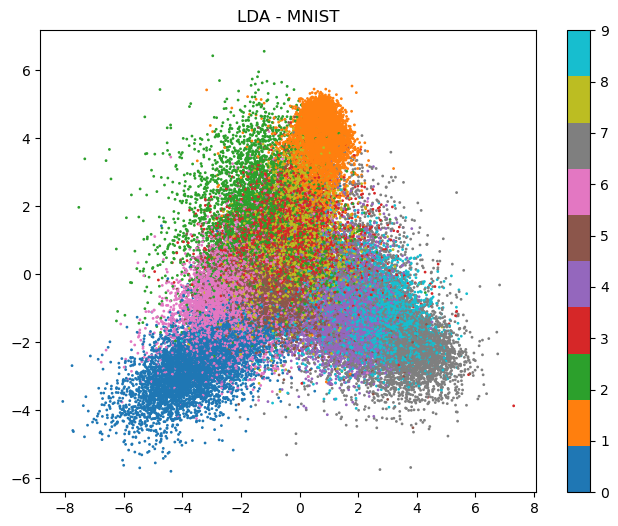

In [17]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='tab10', s=1)
plt.title("LDA - MNIST")
plt.colorbar()
plt.show()


In [19]:
n_samples = 5000
X_subset = X_scaled[:n_samples]
y_subset = y[:n_samples]

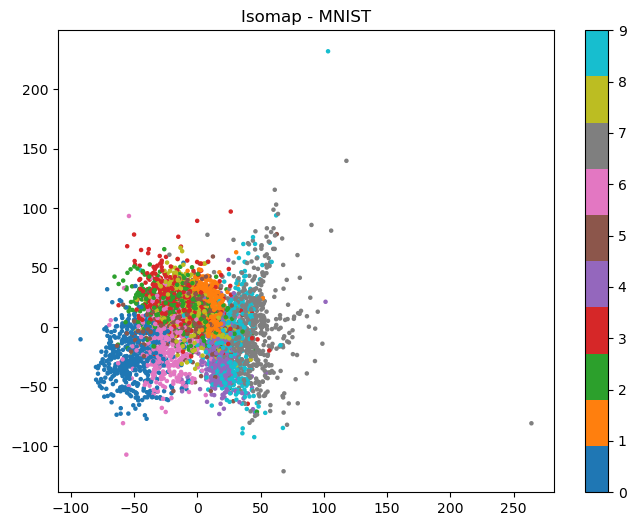

In [21]:
# Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_iso = isomap.fit_transform(X_subset)

plt.figure(figsize=(8,6))
plt.scatter(X_iso[:,0], X_iso[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("Isomap - MNIST")
plt.colorbar()
plt.show()

In [24]:
lap = SpectralEmbedding(n_neighbors=10, n_components=2)
X_lap = lap.fit_transform(X_subset)

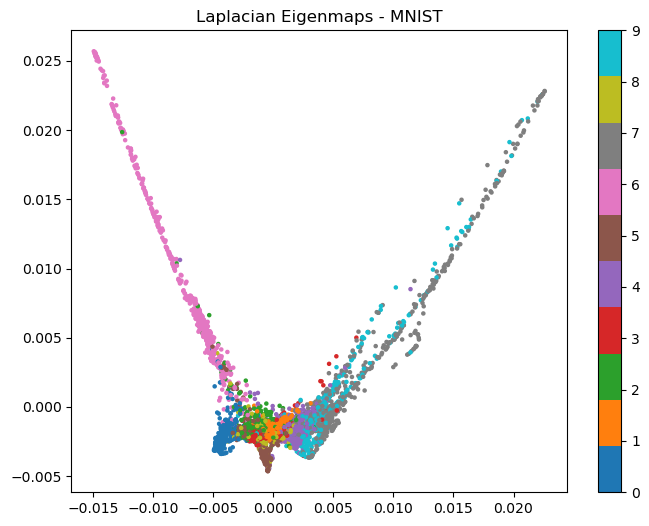

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_lap[:,0], X_lap[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("Laplacian Eigenmaps - MNIST")
plt.colorbar()
plt.show()

In [32]:
def knn_accuracy(X_data, y_data, name):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42
    )
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"{name} + KNN Accuracy: {acc:.4f}")
knn_accuracy(PCA(n_components=50).fit_transform(X_scaled), y, "PCA")
knn_accuracy(LinearDiscriminantAnalysis(n_components=9).fit_transform(X_scaled, y), y, "LDA")
knn_accuracy(Isomap(n_neighbors=10, n_components=50).fit_transform(X_subset), y_subset, "Isomap")
knn_accuracy(SpectralEmbedding(n_neighbors=10, n_components=50).fit_transform(X_subset), y_subset, "Laplacian")

PCA + KNN Accuracy: 0.9602
LDA + KNN Accuracy: 0.9205
Isomap + KNN Accuracy: 0.8910
Laplacian + KNN Accuracy: 0.8860
